# Implementing Multiclass Logistic Regression From Scratch

## Importing Packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Loading Data

In [2]:
# !gzip -dk *.gz ## To unzip files, if you are using Linux
def load_data(name):
    base = "C:\\GitHub\\MLGym\\MNIST\\"
    f = open(base + name, 'rb')
    data = f.read()
    magic_number = int((data[0:4]).hex(), 16)
    examples = int((data[4:8]).hex(), 16)
    mat = []
    if magic_number == 2051:
        # Images
        for i in range(examples):
            features = []
            for j in range(28*28):
                pixel = data[i*28*28 + j + 12]
                # Scaling
                features.append(pixel/255)
            mat.append(features)
    else:
        # Labels
        for i in range(examples):
            label = data[i+8]
            mat.append(label)
    f.close()
    return mat

train_data_images = "train-images.idx3-ubyte"
train_data_labels = "train-labels.idx1-ubyte"
test_data_images = "t10k-images.idx3-ubyte"
test_data_labels = "t10k-labels.idx1-ubyte"

X_train = np.array(load_data(train_data_images))
y_train = np.array(load_data(train_data_labels))
X_test = np.array(load_data(test_data_images))
y_test = np.array(load_data(test_data_labels))

num_features = X_train.shape[1]
num_classes = 10 #  Known beforehand
num_train = X_train.shape[0]
num_test = X_test.shape[0]


In [3]:
print(num_features, num_classes, num_train, num_test)

784 10 60000 10000


## Visualise Digits as Images

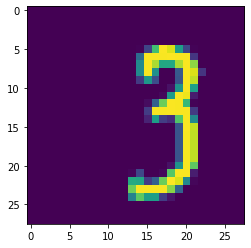

NameError: name 'W_pred' is not defined

In [6]:
id = 856
plt.imshow(X_train[id].reshape(28, 28), interpolation='nearest')
plt.show()
print("Predicted: ", Predict(PredictProbs(W_pred, b_pred, X_train[id:id+1])) , " Actual: ", y_train[id])

## Helper Functions

In [5]:
threshold = 0.7 # Not used
def Softmax(values):
    biased = values - np.mean(values)
    exps = np.exp(biased)
    return exps/np.sum(exps, axis = 0, keepdims=True) # All the features are present in a column

# Converts a matrix y containing test labels to a hot encoding
def HotEncoding(y, num):
    code = np.zeros((num, y.shape[0]))
    for i in range(y.shape[0]):
        code[y[i]][i] = 1
    return code

# 
def Initialise(num_features, num_classes):
    # Seeding the value for reproducible results
    np.random.seed(8)
    # Contains transpose of weight vectors each row corresponding to each class
    weights = np.zeros((num_classes, num_features))
    for i in range(num_classes):
        weights[i, :] = np.random.randint(10, size=num_features)/200
    b = np.zeros((num_classes, 1))
    return weights, b

def PredictProbs(W, b, X):
    # Re turns the probability (by softmax) on all samples in X given W and b
    return (Softmax(np.matmul(W, X.T) + b))

def Predict(preds):
    # Returns the predicted class from the softmax probabilities
    prediction = []
    for i in range(preds.shape[1]):
        prediction.append(np.argmax(preds[:, i]))
    return prediction

def CrossEntropyLoss(EncodedY, preds):
    # Calculates the cross entropy loss by adding up negative log likelihood of softmax probabilities
    loss = 0
    m = EncodedY.shape[1]
    for i in range(m):
        code = EncodedY[:,i:i+1]
        loss += np.dot(code.T, np.log(preds[:, i:i+1]))
    return -np.squeeze(loss)/m

def UpdateTheta(alpha, X, preds, EncodedY):
    # Updates theta denoted by W here by W[k] = W[k] + (alpha/m)*sum over x(i) .(1{y = k} - softmax(k)) in vectorised format
    return alpha*(np.matmul((EncodedY - preds), X))/EncodedY.shape[1]

def Updateb(alpha, preds, EncodedY):
    # Updates b here by b = b + (alpha/m)*sum over (1 {y = k} - softmax(k))
    return alpha*np.sum(EncodedY - preds, axis=1, keepdims=True)/EncodedY.shape[1]

def Update(W, b, alpha, X, preds, EncodedY):
    return W + UpdateTheta(alpha, X, preds, EncodedY), b + Updateb(alpha, preds, EncodedY)

### Verifying the functions

In [7]:
# softmax([2, 4, 5])

W, b = Initialise(num_features, num_classes)
# W, b = Update(W, b, 0.5, X_train, y_train, preds, num_classes)
preds = PredictProbs(W, b, X_train)
# print(preds[:, 10])
# print(Softmax(np.matmul(W, X_train[:2].T) + b ) > 0.1 )
# preds = PredictProbs(W, b, X_train)
# print(preds[:, 0])
# print(CrossEntropyLoss(y_train,  preds))
# print(X_train.shape, W.shape)
# print((HotEncoding(y_train, 10) - preds))
# print(Updateb(0.005, X_train, y_train, preds, num_classes).shape)
# X_train[:10].T[400]
# print(softmax(np.ones((10, 1))*50))

 ## Softmax Regression

In [8]:
# alpha is the learning rate, num_iters is the maximum number of iterations, tol is the tolerance
def SoftmaxRegression(alpha, num_iters, tol, X, y):
    num_features = X.shape[1]
    num_classes = 10
    num_samples = X.shape[0]
    W, b = Initialise(num_features, num_classes)
    preds = PredictProbs(W, b, X)
    EncodedY = HotEncoding(y, num_classes)
    mincost = 10
    minW, minb = W, b
    for i in range(num_iters):
        W, b = Update(W, b, alpha, X, preds, EncodedY)
        preds = PredictProbs(W, b, X)
        cost = CrossEntropyLoss(EncodedY, preds)
        if cost < mincost:
            mincost = cost
            minW = W
            minb = b
        if abs(cost) < tol:
            break
        if i % 20 == 0:
            print("Cross Entropy Loss: ", i,  cost)
    print(mincost)
    return W, b, minW, minb

## Top Implementation

In [10]:
# Experimentally found that 1.5 is the best learning rate before it fails to converge at alpha = 2 onwards. 
# The algorithm doesn't reduce the loss to a very good value. It is just decent.
W_pred, b_pred, W_min, b_min = SoftmaxRegression(1.5, 500, 0.1, X_train, y_train)

Cross Entropy Loss:  0 1.53356972429336
Cross Entropy Loss:  20 0.7132343433868368
Cross Entropy Loss:  40 0.386684399534127
Cross Entropy Loss:  60 0.4419231535992702
Cross Entropy Loss:  80 0.34015452727495044
Cross Entropy Loss:  100 0.32765589839502474
Cross Entropy Loss:  120 0.4035897815537382
Cross Entropy Loss:  140 0.31095433309931725
Cross Entropy Loss:  160 0.30467135274905993
Cross Entropy Loss:  180 0.3011731464432132
Cross Entropy Loss:  200 0.3010959731528064
Cross Entropy Loss:  220 0.3088160672024943
Cross Entropy Loss:  240 0.29783227607858387
Cross Entropy Loss:  260 0.2909473707186475
Cross Entropy Loss:  280 0.28819452891738395
Cross Entropy Loss:  300 0.28615258848126973
Cross Entropy Loss:  320 0.2843976122159213
Cross Entropy Loss:  340 0.28283755862966886
Cross Entropy Loss:  360 0.28142318418687556
Cross Entropy Loss:  380 0.28011953778999166
Cross Entropy Loss:  400 0.27890550507144124
Cross Entropy Loss:  420 0.2777686984009599
Cross Entropy Loss:  440 0.276

In [11]:
print("Training Accuracy: " ,  np.mean(y_train == Predict(PredictProbs(W_min, b_min, X_train)) ))

Training Accuracy:  0.924


In [12]:
# print(W_pred.shape, b_pred.shape)
print("Test Accuracy: " , np.mean(y_test == Predict(PredictProbs(W_min, b_min, X_test)) ))

Test Accuracy:  0.9221


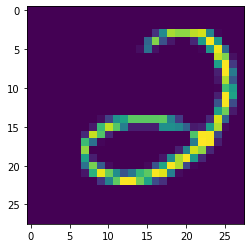

Predicted:  6  Actual:  2


In [13]:
def PredSingle(W_pred, b_pred, sample):
    return np.argmax(Softmax(np.matmul(W_pred, sample.reshape(1, sample.shape[0]).T) + b_pred))
wrong_indices = [i for i, x in enumerate(y_test != Predict(PredictProbs(W_pred, b_pred, X_test)) ) if x == 1]
id = wrong_indices[96]
plt.imshow(X_test[id].reshape(28, 28), interpolation='nearest')
plt.show()
print("Predicted: ", Predict(PredictProbs(W_pred, b_pred, X_test[id:id+1]))[0] , " Actual: ", y_test[id])


## Trying out a resized image from a handwritten digit

In [14]:
imgt = np.array([0.6158610966985649, 0.6144819827613176, 0.6130830440615705, 0.6104687127214969, 0.6052823985603087, 0.6040319057172719, 0.6027533051265325, 0.6013867523378605, 0.5909306439977834, 0.6157861789807889, 0.5909913648139321, 0.5975600780716835, 0.5935705757958324, 0.5726116896491911, 0.6104939038293842, 0.6275081673285838, 0.6079021687548751, 0.6287690404397772, 0.6249213714477354, 0.6368696673695726, 0.652549490950056, 0.6406055702254472, 0.6287690404397772, 0.614465297803123, 0.6197650168815587, 0.6301494262252696, 0.6392237057919492, 0.6340057944770502, 0.6144819827613176, 0.6144319265274885, 0.6156862745098041, 0.6104687127214969, 0.6092036218936662, 0.6013611797301848, 0.6000598030771592, 0.5948516788242907, 0.6026937693156945, 0.5608939972263631, 0.600102515912072, 0.573966371726935, 0.5726116896491911, 0.6274591502736084, 0.6026342276231582, 0.590869916941653, 0.6000000000000001, 0.6287771931952988, 0.6368696673695726, 0.6423596446776075, 0.6384413289519288, 0.6172703488612078, 0.6248557439570509, 0.6575657149563799, 0.6340866440010184, 0.6340704749209465, 0.63921568627451, 0.6339977089575921, 0.6118233590116685, 0.6130830440615705, 0.6143985534392814, 0.6104771098729596, 0.6039300568115823, 0.5947913520984295, 0.5896497156220412, 0.5896497156220412, 0.5830446366400696, 0.6235869583343123, 0.5843751338525891, 0.5947913520984295, 0.6013611797301848, 0.5778871927866421, 0.6200379081646497, 0.612175159775628, 0.5885750652709217, 0.6003331127074327, 0.6349107210738066, 0.6455597608620682, 0.6299012614120886, 0.6412134465962646, 0.6485741812142555, 0.6196657538917253, 0.6392718207839226, 0.6366200960843398, 0.6366200960843398, 0.6406055702254472, 0.6091615472051413, 0.611764705882353, 0.613124849643856, 0.6104771098729596, 0.6026342276231582, 0.5909393187820853, 0.5871580550168674, 0.5857638714402853, 0.568636466009223, 0.6014123238581655, 0.564878332419479, 0.6119238941537742, 0.5937519096875338, 0.5690600112681018, 0.560706608264135, 0.3227223048042979, 0.20940344161080993, 0.39124076002902186, 0.5144783188198425, 0.5357021595937549, 0.5981988429414813, 0.6445306124365292, 0.6242196204571189, 0.6341513161986445, 0.6432328958058879, 0.6314293807897414, 0.6340866440010184, 0.6380397379191295, 0.6104771098729596, 0.6104771098729596, 0.6092541076844376, 0.6092036218936662, 0.5961386278514066, 0.587219165933972, 0.5768972677317339, 0.5818873163287439, 0.5804539801024613, 0.5847434485988072, 0.5887666445483023, 0.5837124598693615, 0.555046287150134, 0.4304327254690146, 0.21822627984366302, 0.10198591947602369, 0.11020003249250065, 0.12078601136231644, 0.19063018984684918, 0.20273662767858755, 0.25946642278849585, 0.45295956729208775, 0.6040276623557396, 0.6515549869839793, 0.642168088511369, 0.6380718745031086, 0.6407655936018005, 0.6446538789197699, 0.6039300568115823, 0.6065556679237292, 0.6053332113876784, 0.6052823985603087, 0.5909393187820853, 0.5808159555003489, 0.5770127724646469, 0.5830973873348688, 0.6106366338108442, 0.5879258445307362, 0.5765372777217836, 0.44926642187735, 0.2236555085223137, 0.10328451923384577, 0.1052510835733368, 0.1273151614176308, 0.0850778567073097, 0.15009928791376187, 0.32851574372341885, 0.33562457437975546, 0.2203884352952597, 0.2464563668090982, 0.4218132745057651, 0.6192312912221951, 0.6398008468815771, 0.6448923922766507, 0.6486057958465538, 0.6486057958465538, 0.6039809834112662, 0.6026512401355864, 0.6066232752099115, 0.6000598030771592, 0.5870183490310952, 0.5793799688255575, 0.5793888165500815, 0.5856413395131127, 0.5981259982035793, 0.5107733367279844, 0.26644550613701967, 0.09840454807263208, 0.0850778567073097, 0.11430996978101546, 0.15188169985127126, 0.16935547358187597, 0.3171302177895428, 0.5523475235290609, 0.6754022064361338, 0.610678606868489, 0.5171368053602037, 0.2775369967590577, 0.2031281699838411, 0.5190217436886752, 0.6242196204571189, 0.6476368976504173, 0.6539423912178003, 0.644685685799138, 0.6014464175273457, 0.5974914452684972, 0.6000598030771592, 0.5947913520984295, 0.5843751338525891, 0.5830973873348688, 0.583062220735275, 0.5909913648139321, 0.5166458926011737, 0.21389631597324932, 0.11131085467889071, 0.10549432652214473, 0.15674832428192934, 0.1608161932368029, 0.14398086078969272, 0.348446323622423, 0.6461709099017696, 0.6548510801729197, 0.6719246706587403, 0.6618162652390956, 0.6529617849894973, 0.4617081546765612, 0.24201723899397715, 0.3229128607259188, 0.6074255364992388, 0.6370869562504217, 0.6525259234223402, 0.6380718745031086, 0.595265183104195, 0.5949981611224314, 0.590869916941653, 0.5804009891573145, 0.5764794806125765, 0.606547216483104, 0.5857113608960576, 0.5472145864880221, 0.22831703497734984, 0.1250400422856797, 0.12717415890147588, 0.23506524816699154, 0.3457658422769745, 0.16113464145606757, 0.20135386947112097, 0.5522129353584434, 0.6779211500877188, 0.6605990702506667, 0.669811880989276, 0.6348380514205669, 0.6689656630283098, 0.592239097436682, 0.3890464886348521, 0.19300864966118578, 0.4665183484851154, 0.6527615604094452, 0.6485741812142555, 0.648447707271561, 0.5862012763844042, 0.5835104361241057, 0.5922174578354779, 0.5725579728908701, 0.6039809834112662, 0.5663148827785573, 0.5746269036787023, 0.3401758295757556, 0.15498880663034909, 0.11873138643519576, 0.2507862811453486, 0.4352764525650701, 0.3767836389059714, 0.18957854063171484, 0.3228255365575923, 0.6266743559697421, 0.6735401146508123, 0.6536914961108632, 0.6576436680726835, 0.6368455195841692, 0.6566802985331673, 0.620302415363015, 0.48502897622622443, 0.23163826549995858, 0.3972802577897965, 0.6253313872196982, 0.6458812814734497, 0.6549567508684355, 0.5680998228207486, 0.5991835189668624, 0.5634927055601794, 0.5947913520984295, 0.5937605432534172, 0.5747696215905731, 0.4375493600979288, 0.15445870227572736, 0.09819595314156013, 0.19425294024294287, 0.41563694367541565, 0.5933589495483312, 0.3574798944275085, 0.20446132688598462, 0.43534710859224846, 0.6784427064677212, 0.6693755039552907, 0.648384461048956, 0.644463004677777, 0.6392718207839226, 0.6341189809243007, 0.6449241873928291, 0.5890451940867211, 0.2753767821813453, 0.33476049728440066, 0.6135511038762742, 0.6562898682225836, 0.6523059187698523, 0.5666135171944691, 0.5964910852339309, 0.5634927055601794, 0.594782733495247, 0.5887666445483023, 0.531267625846872, 0.23479249361576895, 0.10631718989588988, 0.15292441671200738, 0.3935009645465491, 0.5531358300125527, 0.6027703142781323, 0.2953178127617937, 0.2159712911845391, 0.5006979621631851, 0.6780421264259716, 0.662799239773258, 0.6536758119692505, 0.6340381355237831, 0.640541549681105, 0.6262447555968814, 0.6356087335224007, 0.6282103248324298, 0.3026306126449458, 0.31821944717087014, 0.6267111651563186, 0.661564481934701, 0.644463004677777, 0.589727953666903, 0.5779670230989173, 0.5870183490310952, 0.5843751338525891, 0.5802729077281578, 0.36000199352973034, 0.1283976905391757, 0.1514253692259437, 0.3496066151247316, 0.5699511300606742, 0.6090815972896101, 0.5688933342771337, 0.26390340719689365, 0.24306345074231445, 0.5563193519239928, 0.6712835137345974, 0.6562273778162697, 0.662799239773258, 0.6262283840409968, 0.644463004677777, 0.6380075997164234, 0.6199304198780667, 0.6192644038669641, 0.3204587894007845, 0.3204587894007845, 0.6360440985874668, 0.6681759156164785, 0.6419285629198542, 0.5961386278514066, 0.5882962931335484, 0.5634563153888077, 0.6249213714477354, 0.44752297886141734, 0.20715139542847308, 0.14010120653033167, 0.2628036223963374, 0.5291938549355042, 0.6043373494468424, 0.5952910175847359, 0.5656129244138619, 0.28381971957211344, 0.24306345074231445, 0.5768750526317118, 0.6673122594950837, 0.6510355122738714, 0.6614559918993335, 0.6314293807897414, 0.648384461048956, 0.6497705112485658, 0.6174945345444232, 0.5975815242061423, 0.3216084783214011, 0.335196637589931, 0.6337267844418287, 0.6657009537592391, 0.6445743548546642, 0.6000598030771592, 0.5987042268512219, 0.550348531699426, 0.5896323279800338, 0.2735370252179122, 0.16679349269126856, 0.2144826786209669, 0.44816970111163174, 0.6030423954573627, 0.5832907657341639, 0.5820722899359365, 0.5717829954846623, 0.32630813049504154, 0.22355234373827376, 0.5523475235290609, 0.6583370441643721, 0.6562898682225836, 0.6536130716392229, 0.63921568627451, 0.644463004677777, 0.6407335921238001, 0.6282103248324298, 0.5864766739992313, 0.29224677302312924, 0.3790962360281405, 0.6445306124365292, 0.6605680296139419, 0.6498336225713637, 0.6013952762987744, 0.5700275753215264, 0.6000598030771592, 0.47493094259132096, 0.19341988543718136, 0.16577616774782944, 0.29716072800741383, 0.6004569151775115, 0.6119992846722276, 0.5950326223049239, 0.6041591927045697, 0.5780645785090305, 0.36326230571771484, 0.20980697572757148, 0.5124016270463221, 0.6587651701509996, 0.6668127483165286, 0.6418487011923841, 0.6457622184308923, 0.6392718207839226, 0.6186681051037913, 0.6309217730725611, 0.5757943657316871, 0.2545296426198532, 0.4227601340893746, 0.660230368457519, 0.6672892133636166, 0.6500071471131826, 0.6001793913547827, 0.5805599474824171, 0.6120914160289432, 0.4430504860391718, 0.15135764767996904, 0.16903734950786123, 0.49599188064113, 0.6309217730725611, 0.6066401758541878, 0.6013270812282449, 0.6196161164335552, 0.5817904019208886, 0.4822838571070906, 0.21016095697214532, 0.37664756188939646, 0.6607814045435466, 0.647209330881643, 0.6693142352881795, 0.6300762074297344, 0.636684510942769, 0.6343452932311157, 0.6163852657613993, 0.4985278854225643, 0.19976918630509852, 0.494620555359805, 0.6677960445326295, 0.6595312103331903, 0.6437825552698826, 0.6092541076844376, 0.5976801665130229, 0.5796984018334874, 0.37278973991147196, 0.14611900125320157, 0.2927812777243936, 0.5694472341713906, 0.6252985958517039, 0.6209342962268074, 0.607843137254902, 0.6039300568115823, 0.5974742858358324, 0.5287480710314747, 0.24231359538471228, 0.2728709247731778, 0.5141344478093215, 0.6564694950053758, 0.6288098031603496, 0.671974258491615, 0.6395283729377357, 0.6358828870224027, 0.5996538794058663, 0.37846692914336594, 0.22995020885365391, 0.54929498229342, 0.6819584164849692, 0.6595312103331903, 0.6477002168706262, 0.6092541076844376, 0.6119238941537742, 0.539107535202734, 0.2985461804535203, 0.12355534534292388, 0.421399875025231, 0.6321109634807053, 0.6250854100297942, 0.6300762074297344, 0.6156946005015486, 0.5987299129411517, 0.6170460817266735, 0.5743681370761929, 0.3126861870058827, 0.18557488152379226, 0.34215920369257435, 0.6152573336168115, 0.6292498722833011, 0.6423835851820483, 0.6035097483918112, 0.65598907853113, 0.4917309304472086, 0.21009996827212574, 0.32296048213859885, 0.6208228345721364, 0.6858747668650013, 0.6594534803407773, 0.6515549869839793, 0.5987127890036418, 0.6170793116303935, 0.5415457677162052, 0.30964668798939465, 0.1515607215383091, 0.4833190813102459, 0.629217285125378, 0.6184360558673139, 0.6196078431372549, 0.6143985534392814, 0.6039809834112662, 0.620967318060041, 0.5976715895674103, 0.42248721929517447, 0.20131567760731756, 0.22327700460834934, 0.4830909917583672, 0.6314821485679666, 0.6588741032565126, 0.6511890365694124, 0.5886055479632938, 0.30658541624615004, 0.2254475663028206, 0.4995499704838152, 0.6584616186165146, 0.6712835137345974, 0.6488112534071355, 0.6460876054373603, 0.5987127890036418, 0.6196657538917253, 0.5753535039363731, 0.4227601340893746, 0.2875787284457358, 0.5340345256024512, 0.6094055399619845, 0.6144819827613176, 0.6196078431372549, 0.6065556679237292, 0.6118233590116685, 0.6104771098729596, 0.602795827105628, 0.5459719331502069, 0.30691964224340956, 0.16714656016397939, 0.31531460278784623, 0.5326552783188706, 0.6731518478224924, 0.607741927057763, 0.3391646793794456, 0.1986369030392057, 0.3882352941176471, 0.5934280602946731, 0.6634485959529932, 0.6554731179309564, 0.6486057958465538, 0.6498020676761671, 0.611773085245111, 0.6143985534392814, 0.60923727955236, 0.5584117276415336, 0.48151795522296137, 0.5990722889021941, 0.6105946578679179, 0.6130914054060794, 0.6261628935369765, 0.6000598030771592, 0.6131750125802586, 0.6000085436616716, 0.6170793116303935, 0.6174696290435946, 0.43978138173310893, 0.19894634666915917, 0.17706508432101487, 0.36069194611867034, 0.49448580537103753, 0.3577880698966916, 0.20496215146210503, 0.341791947286708, 0.5816890650483044, 0.6791186212700511, 0.6633095017154513, 0.6486057958465538, 0.6497705112485658, 0.6471142776791944, 0.6157445540877814, 0.6039300568115823, 0.6157445540877814, 0.6210003381373311, 0.6053162742524936, 0.6210003381373311, 0.6275081673285838, 0.611764705882353, 0.6235869583343123, 0.5974914452684972, 0.6210168475175849, 0.6000085436616716, 0.6275081673285838, 0.6211901695195092, 0.5616338005778829, 0.3477762976361215, 0.1748362958888054, 0.16447229000400607, 0.15666654396422103, 0.1564700968098824, 0.3691416244414828, 0.6235910686003604, 0.6544203935687264, 0.6449241873928291, 0.6564148311880331, 0.6431930471575613, 0.644463004677777, 0.6418407144731086, 0.6118233590116685, 0.6000598030771592, 0.6026342276231582, 0.6157445540877814, 0.6275081673285838, 0.6039809834112662, 0.6339977089575921, 0.6156946005015486, 0.6170959259112314, 0.5975257626555002, 0.6327796604506145, 0.6026342276231582, 0.6300762074297344, 0.5910347330061353, 0.6409815617885309, 0.5124066291854722, 0.2908753752321471, 0.2191989657705971, 0.24009268149358376, 0.4080567565240387, 0.6039767396919689, 0.6712987864921752, 0.6449003412026555, 0.6642555398891941, 0.6549567508684355, 0.6418407144731086, 0.63921568627451, 0.627450980392157, 0.6092541076844376, 0.6118233590116685, 0.611773085245111, 0.6143985534392814, 0.6143985534392814, 0.6183199985919274, 0.6143985534392814, 0.611773085245111, 0.6131750125802586, 0.6131750125802586, 0.6131750125802586, 0.6118233590116685, 0.6143985534392814, 0.6196657538917253, 0.6223979539837496, 0.6306048188239837, 0.5545612016375251, 0.5027618199986356, 0.5140197730182151, 0.607518361474274, 0.6658703433176445, 0.6603895176386801, 0.652368784812839, 0.666720489945707, 0.63921568627451, 0.6352941176470589, 0.6287690404397772, 0.6287690404397772, 0.6092541076844376, 0.6092541076844376, 0.6065556679237292, 0.611773085245111, 0.611773085245111, 0.6183199985919274, 0.611773085245111, 0.611773085245111, 0.6157445540877814, 0.6092541076844376, 0.6092541076844376, 0.6104771098729596, 0.6156862745098041, 0.6183117079529719, 0.6249213714477354, 0.6290298762058556, 0.6451308174520092, 0.6309948937511485, 0.6397046928594357, 0.6670356533652743, 0.6628920438864893, 0.6406215743618615, 0.6340057944770502, 0.6353021866670655, 0.6379272471261226, 0.6340057944770502, 0.6287690404397772, 0.6287690404397772, 0.6079021687548751, 0.6039809834112662, 0.6065556679237292, 0.611773085245111, 0.614415240209975, 0.6183365795363565, 0.614415240209975, 0.614415240209975, 0.6118233590116685, 0.6118233590116685, 0.6104771098729596, 0.6104771098729596, 0.6156862745098041, 0.6183117079529719, 0.6235869583343123, 0.6288424114343409, 0.6185686660902873, 0.6381682745451308, 0.6550663172886667, 0.6563054898944666, 0.6405735607530729, 0.6431930471575613, 0.6497073937952559, 0.6431930471575613, 0.6379272471261226, 0.6340057944770502, 0.6313725490196079, 0.6313725490196079, 0.6079021687548751, 0.6039809834112662, 0.6065556679237292, 0.6065556679237292, 0.614415240209975, 0.6183365795363565, 0.614415240209975, 0.614415240209975, 0.6079021687548751, 0.6079021687548751, 0.6104771098729596, 0.6104771098729596, 0.6156862745098041, 0.6196078431372549, 0.6261547067423507, 0.6275081673285838, 0.6210168475175849, 0.6314780896646498, 0.6458336588904191, 0.6471142776791944, 0.641864674332799, 0.6536287572863205, 0.6549567508684355, 0.6431930471575613, 0.6379272471261226, 0.6340057944770502, 0.6313725490196079, 0.627450980392157]) 

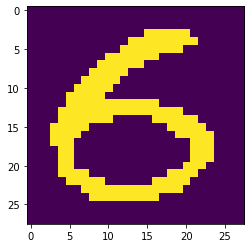

(1, 784)
(10, 784)
(10, 1)
Predicted:  [[9.05583003e-08]
 [3.05429651e-08]
 [7.87776631e-06]
 [9.99329964e-01]
 [7.32042301e-05]
 [4.33507197e-04]
 [2.14901605e-05]
 [3.03631525e-05]
 [1.02964991e-04]
 [5.07094064e-07]]  Actual:  6


In [15]:
imgt[imgt > 0.5] = 1
imgt[imgt < 0.5] = 0
imgd = (1 - imgt).reshape(28,28)
img = np.rot90(np.flip(imgd, axis= 1), 1).reshape(1, 784)
plt.imshow(img.reshape(28, 28), interpolation='nearest')
plt.show()
print(img.shape)
print(W_pred.shape)
print(b_pred.shape)
print("Predicted: ", (PredictProbs(W_min, b_min, img)) , " Actual: ", "6")


## Confusion Matrix

In [16]:
def ConfusionMatrix(y_test, y_pred):
    mat = np.zeros((num_classes, num_classes)).astype(int) # Is a square matrix
    for i in range(len(y_test)):
        mat[y_test[i]][y_pred[i]] += 1
    return mat
print("Row index denotes the actual class and Column index denotes predicted class\n")
print(ConfusionMatrix(y_train, Predict(PredictProbs(W_pred, b_pred, X_train))))
print(ConfusionMatrix(y_test, Predict(PredictProbs(W_pred, b_pred, X_test))))

Row index denotes the actual class and Column index denotes predicted class

[[5733    1   22    9   14   43   43    7   46    5]
 [   1 6557   30   21    6   31    6   15   65   10]
 [  30   65 5355   85   85   28   70   79  134   27]
 [  18   29  122 5502    6  204   26   61  108   55]
 [  13   32   31    6 5460    3   57   17   35  188]
 [  67   30   45  174   64 4741   94   21  129   56]
 [  31   15   43    2   48   71 5669    4   33    2]
 [  24   35   73   20   53    9    3 5854   13  181]
 [  31  121   57  139   28  145   46   14 5195   75]
 [  32   31   18   77  164   35    2  170   46 5374]]
[[ 959    0    3    2    0    4    9    1    2    0]
 [   0 1109    2    2    0    2    4    2   14    0]
 [   7    7  920   15   10    3   14   11   38    7]
 [   3    1   21  918    0   27    2    9   19   10]
 [   1    2    4    1  917    0   11    2    8   36]
 [   9    3    3   33    9  772   18    7   31    7]
 [  11    3    5    1    9   13  911    3    2    0]
 [   2    9   21    9

In [46]:
np.dot(np.array([2,4]).T,np.array([4, 5]).T)

28

In [75]:
[[2.7]] < 1

TypeError: '<' not supported between instances of 'list' and 'int'